<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow
import math
import sys, time

In [37]:
barbara = imread('/content/barbara.jpg')
print(barbara)

[[ 87  92  97 ... 107 115 116]
 [109 112 121 ... 123 128 130]
 [162 161 172 ... 136 134 142]
 ...
 [ 82  88  89 ... 111 112 104]
 [ 84  85  84 ... 112 114 106]
 [ 83  80  83 ... 111 112 104]]


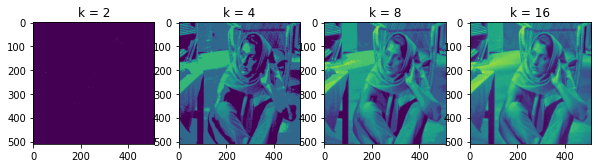

In [38]:
k = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(k), figsize=(10, 6))
for k, ax in zip(k, axis):
    bins = np.linspace(0, barbara.max(), k)
    image = (np.vectorize(bins.tolist().__getitem__)(np.digitize(barbara, bins)-1))
    ax.imshow(image)
    ax.set_title('k = {}'.format(k))

k = 2


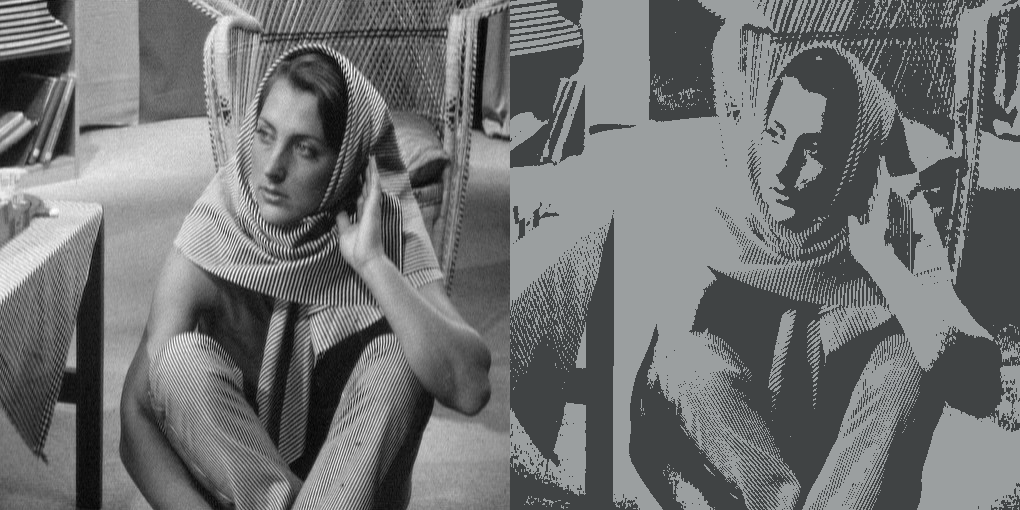

k = 8


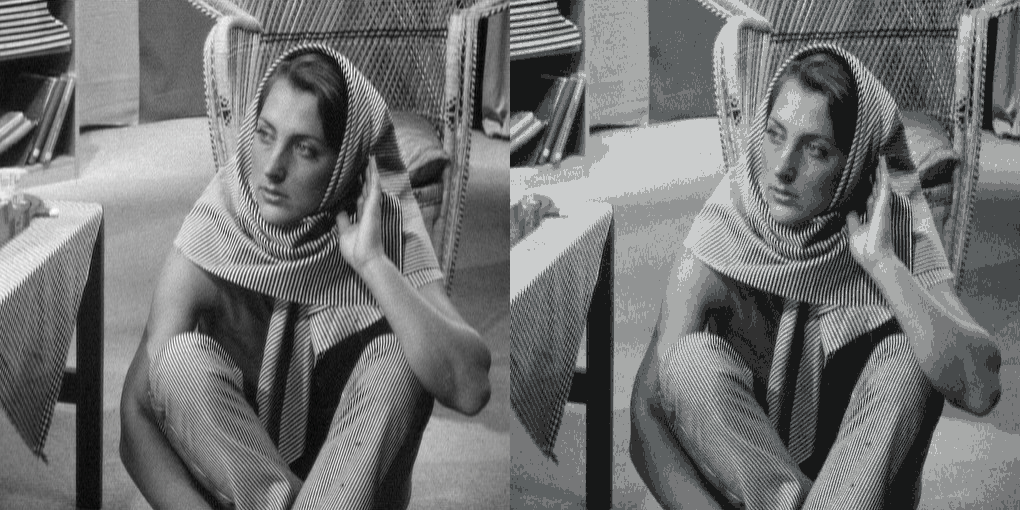

k = 16


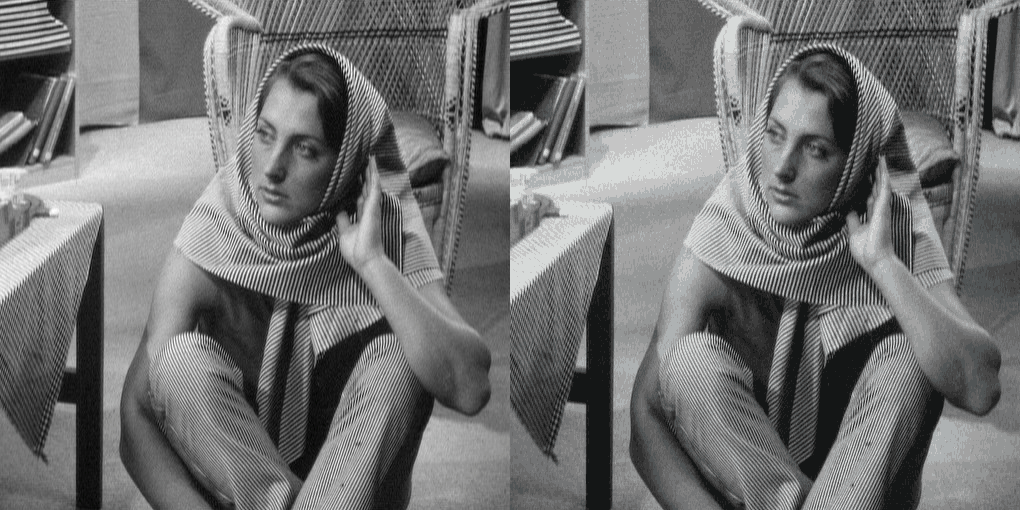

k = 32


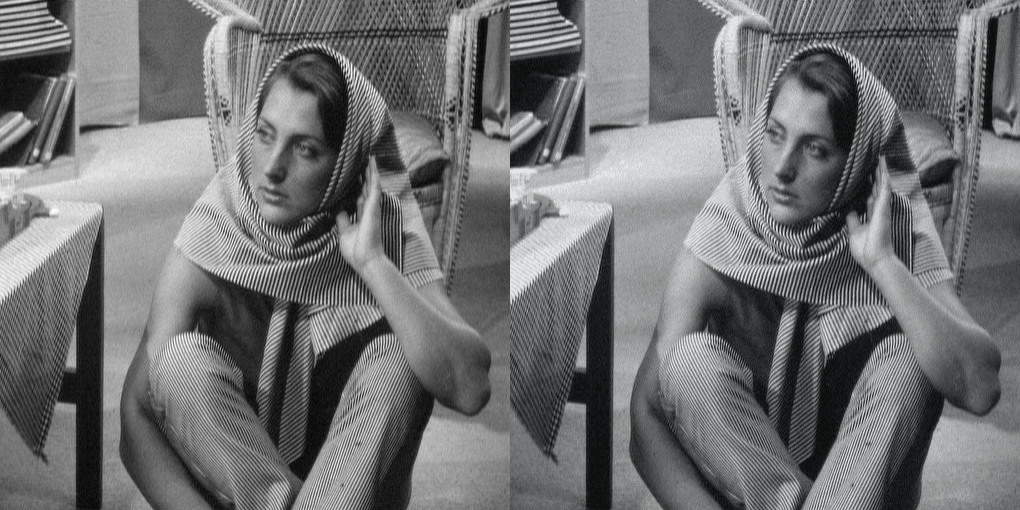

k = 40


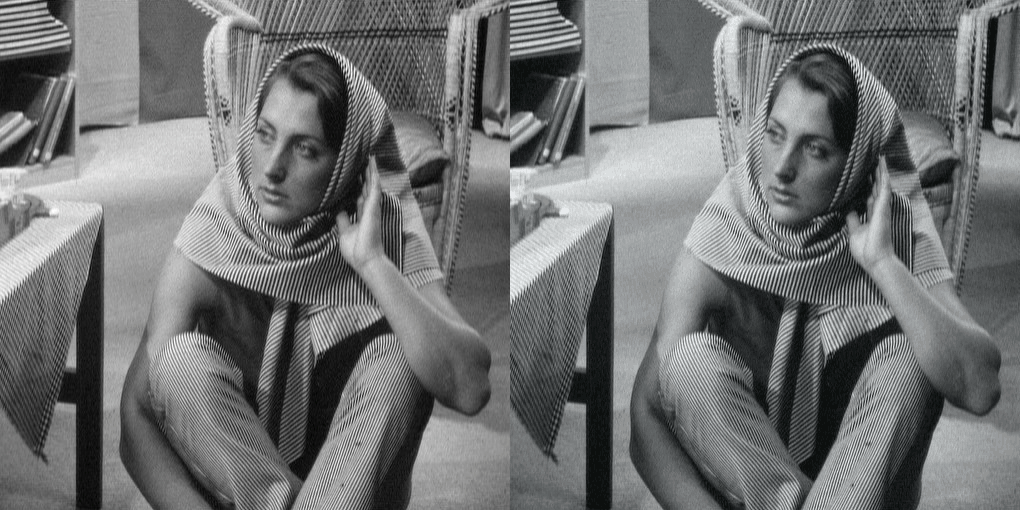

In [40]:
image = cv2.imread('/content/barbara.jpg')
(h, w) = image.shape[:2]
k = [2,8,16,32,40]
for k in k:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = MiniBatchKMeans(n_clusters = k)
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    quant = quant.reshape((h, w, 3))
    image = image.reshape((h, w, 3))
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    print('k = {}'.format(k))
    cv2_imshow(np.hstack([image, quant]))

In [42]:
def u(s, a):
  if (abs(s) >= 0) & (abs(s) <= 1):
    return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
  elif (abs(s) > 1) & (abs(s) <= 2):
    return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
  else:
    return 0

In [57]:
H, W, C = image.shape
padded_img = np.zeros((H+4, W+4, C))

padded_img[2:H+2, 2:W+2, :C] = image
      
# Pad the first/last two col and row
padded_img[2:H+2, 0:2, :C] = image[:, 0:1, :C]
cv2_imshow(image[:, 0:1, :C])
padded_img[H+2:H+4, 2:W+2, :] = image[H-1:H, :, :]
cv2_imshow(image[H-1:H, :, :])
padded_img[2:H+2, W+2:W+4, :] = image[:, W-1:W, :]
cv2_imshow(image[:, W-1:W, :])
padded_img[0:2, 2:W+2, :C] = image[0:1, :, :C]
cv2_imshow(image[0:1, :, :C])
      
# Pad the missing eight points
padded_img[0:2, 0:2, :C] = image[0, 0, :C]
padded_img[H+2:H+4, 0:2, :C] = image[H-1, 0, :C]
padded_img[H+2:H+4, W+2:W+4, :C] = image[H-1, W-1, :C]
padded_img[0:2, W+2:W+4, :C] = image[0, W-1, :C]

